In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
dataparse= lambda x: pd.datetime.strptime(x, '%d-%m-%Y')
adani=pd.read_csv('ADANIENT.csv', parse_dates=['Date'],date_parser=dataparse)
adani.head()

C:\Users\Nachiketh\AppData\Local\Temp\ipykernel_19800\3881619524.py:1: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,ADANIENT,77.8,77.8,76.35,76.95,76.97,2296460
1,2017-01-03,ADANIENT,77.1,77.4,75.80,76.55,76.77,1259423
2,2017-01-04,ADANIENT,77.0,78.8,76.80,77.80,77.78,2179592
3,2017-01-05,ADANIENT,78.5,79.6,78.20,79.15,79.01,2308694
4,2017-01-06,ADANIENT,79.2,79.9,78.40,78.65,78.92,1160629


In [3]:
adani.head()

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,ADANIENT,77.8,77.8,76.35,76.95,76.97,2296460
1,2017-01-03,ADANIENT,77.1,77.4,75.80,76.55,76.77,1259423
2,2017-01-04,ADANIENT,77.0,78.8,76.80,77.80,77.78,2179592
3,2017-01-05,ADANIENT,78.5,79.6,78.20,79.15,79.01,2308694
4,2017-01-06,ADANIENT,79.2,79.9,78.40,78.65,78.92,1160629


In [4]:
print(f'Dataframe contains stock price between {adani.Date.min()} {adani.Date.max()}')
print(f'Total days={(adani.Date.max()  - adani.Date.min()).days}days')

Dataframe contains stock price between 2017-01-02 00:00:00 2022-12-30 00:00:00
Total days=2188days


In [5]:
adani.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1.487000e+03
mean,771.760928,786.192132,757.636012,772.757902,772.786295,6.033077e+06
std,1009.008612,1024.300255,992.715866,1009.616977,1009.239568,7.118941e+06
min,77.000000,77.400000,75.800000,76.550000,76.770000,2.482490e+05
25%,138.475000,141.825000,135.300000,138.400000,138.955000,2.480668e+06
50%,195.800000,201.000000,191.050000,195.900000,196.010000,4.131360e+06
75%,1427.500000,1449.250000,1399.025000,1425.775000,1426.575000,6.771354e+06
max,4175.000000,4190.000000,4066.400000,4165.300000,4125.200000,9.271507e+07


<AxesSubplot:>

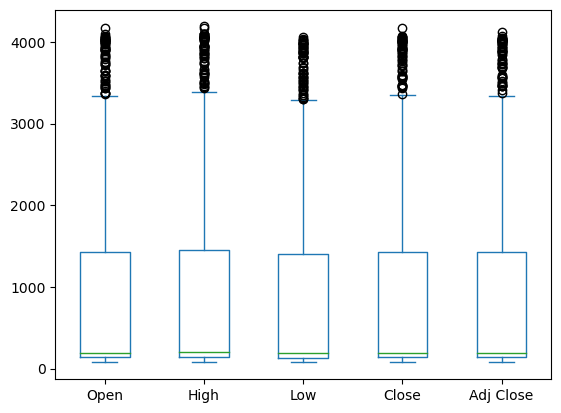

In [6]:
adani[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [7]:
layout=go.Layout(
    title='Stock Price Of Adani Enterprise',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family="Courier New, monospace",
            size=12,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family="Courier New, monospace",
            size=12,
            color='#7f7f7f'
        )
    )
)

adani_data=[{'x':adani['Date'],'y':adani['Close']}]
plot=go.Figure(data=adani_data, layout=layout)

In [8]:
iplot(plot)

In [9]:
#Building the regression model
from sklearn.model_selection import train_test_split
#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#for model evolution
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [10]:
#split the data into train and test sets
X=np.array(adani.index).reshape(-1,1)
Y=adani['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [11]:
#feature scaling
scaler=StandardScaler().fit(X_train)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
#Creating a linear model
lm=LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [14]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = "markers",
    name = "Actual"
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
adani_data = [trace0,trace1]
layout.xaxis.title.text = "Day"
plot2 = go.Figure(data=adani_data, layout=layout)

In [15]:
iplot(plot2)

In [16]:
#calculate scores for model evaluation
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}

'''
print(scores)


Metric           Train                Test        
r2_score  0.6580164043356733	0.6225073514467621
MSE       351185.45666469063	376218.0336376922


